<a href="https://colab.research.google.com/github/s26845/Tutor4/blob/main/tut4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

import kagglehub

import warnings
warnings.filterwarnings("ignore")

In [6]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
dataset_file = f"{path}/data.csv"
df = pd.read_csv(dataset_file)
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [7]:
# Drop irrelevant columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [8]:
# Split dataset into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train models
log_reg.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()


Logistic Regression Metrics:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1-Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



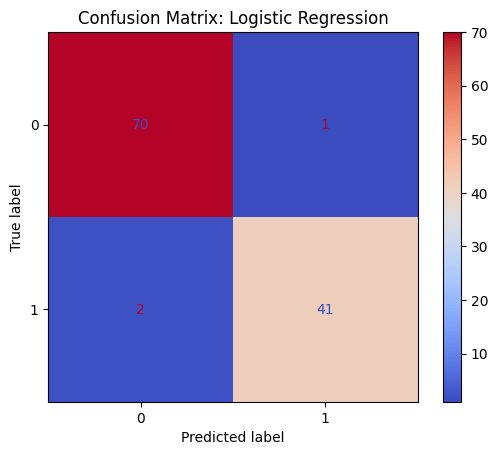


Random Forest Metrics:
Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1-Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



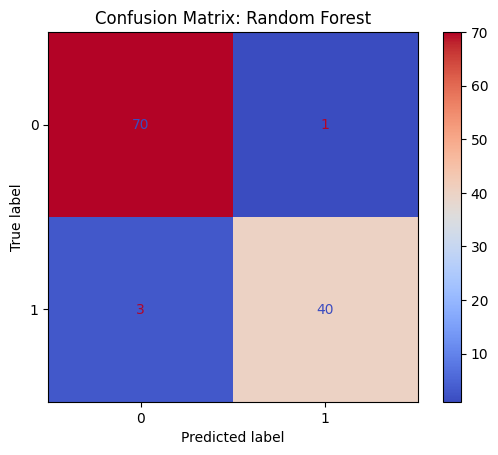


KNN Metrics:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



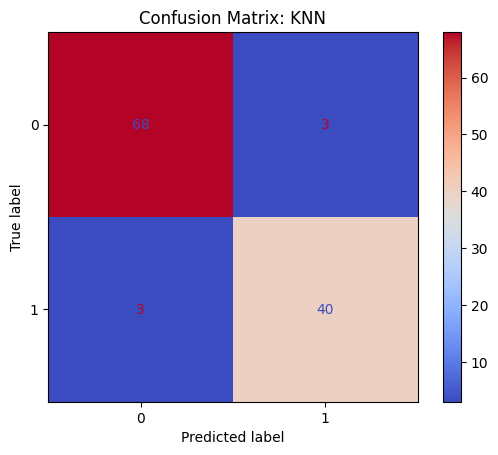

In [10]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='coolwarm')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    return [acc, prec, rec, f1]

# Evaluate all models
results = {}
results["Logistic Regression"] = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
results["Random Forest"] = evaluate_model(rf_model, X_test, y_test, "Random Forest")
results["KNN"] = evaluate_model(knn_model, X_test, y_test, "KNN")



Model Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.973684   0.976190  0.953488  0.964706
Random Forest        0.964912   0.975610  0.930233  0.952381
KNN                  0.947368   0.930233  0.930233  0.930233


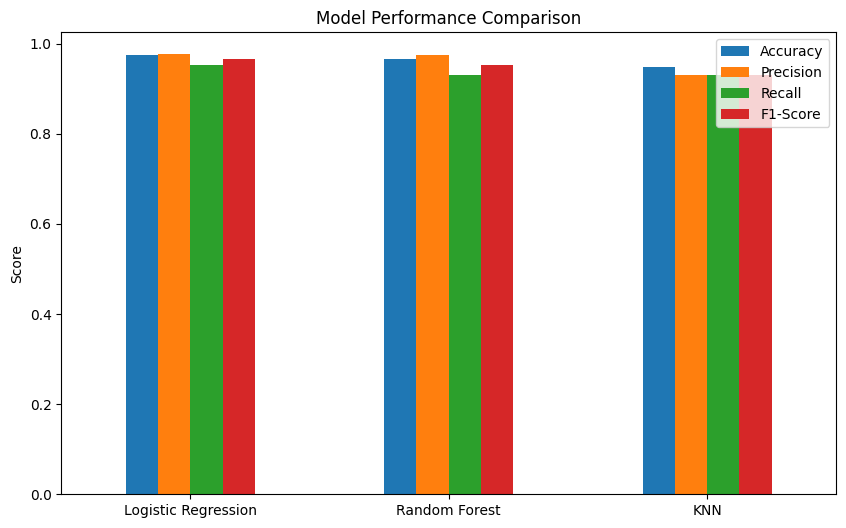

In [11]:
# Summarize results in a DataFrame
comparison_df = pd.DataFrame.from_dict(
    results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score']
)
print("\nModel Comparison:")
print(comparison_df)

# Visualize comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()